# Analysis of Speed Dating dataset

## Introduction

This dataset was compiled by Columbia Business School professors Ray Fisman and Sheena Iyengar for their paper Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment.

Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. 
They were also asked to rate their date on six attributes: 
- Attractiveness
- Sincerity
- Intelligence
- Fun
- Ambition
- Shared Interests.

The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information.

## Data Exploration Ideas 
- What are the least desirable attributes in a male partner? Does this differ for female partners?
- How important do people think attractiveness is in potential mate selection vs. its real impact?
- Are shared interests more important than a shared racial background?
- Can people accurately predict their own perceived value in the dating market?
- In terms of getting a second date, is it better to be someone's first speed date of the night or their last?

## Table of Contests 
1. [Exploratory data analysis] (#Exploratory data analysis)
2. [Modeling] (#Exploratory data analysis)
3. [Conclusion] (#Conclusion)


## 1. Exploratory data analysis
First of all, let's load our data and get some details.

In [3]:
#importing packages
%matplotlib inline
import pandas as pd
pd.options.display.max_rows = 1000 #handy for showing truncated results
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from scipy import stats

dating = pd.read_csv(r'C:\Users\Igor\Speed Dating Data.csv', encoding="ISO-8859-1")       
print("The dataframe has {} rows and {} columns".format(dating.shape[0], dating.shape[1]))
dating.head(5)

The dataframe has 8378 rows and 195 columns


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


Next, we're going to check wheather our dataset has some null rows.

In [4]:
display(dating.isnull().sum())
dating.shape

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

(8378, 195)

As we see, there are many rows that have the significant number of null values.
We will deal with that further in our analysis. For now, let's check ages of people who take part in speed dating. 

Text(0,0.5,'Frequency')

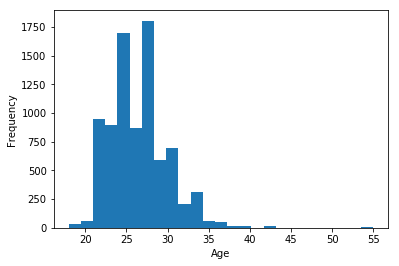

In [16]:
# age distribution of participants
age = dating[np.isfinite(dating['age'])]['age']
plt.hist(age.values, bins=25)
plt.xlabel('Age')
plt.ylabel('Frequency')

**1st result:** Most of the participants were 22-30 years old.

In [17]:
pd.crosstab(index=dating['match'],columns="count")

col_0,count
match,
0,6998
1,1380


**2nd result:** About 20% of people had a match after the speed dating session.

For the next analysis, I will keep only columns where the number of null values less than 10%.

In [25]:
dating_cleaned = dating.loc[:, dating.isnull().mean() < .10]
dating_cleaned.isnull().sum()

iid           0
id            1
gender        0
idg           0
condtn        0
wave          0
round         0
position      0
order         0
partner       0
pid          10
match         0
int_corr    158
samerace      0
age_o       104
race_o       73
pf_o_att     89
pf_o_sin     89
pf_o_int     89
pf_o_fun     98
pf_o_amb    107
pf_o_sha    129
dec_o         0
attr_o      212
sinc_o      287
intel_o     306
fun_o       360
amb_o       722
like_o      250
prob_o      318
met_o       385
age          95
field        63
field_cd     82
race         63
imprace      79
imprelig     79
from         79
goal         79
date         97
go_out       79
career       89
career_c    138
sports       79
tvsports     79
exercise     79
dining       79
museums      79
art          79
hiking       79
gaming       79
clubbing     79
reading      79
tv           79
theater      79
movies       79
concerts     79
music        79
shopping     79
yoga         79
exphappy    101
attr1_1      79
sinc1_1 

Next, we will make a correlation map to figure out the causes that influence partners' decision.

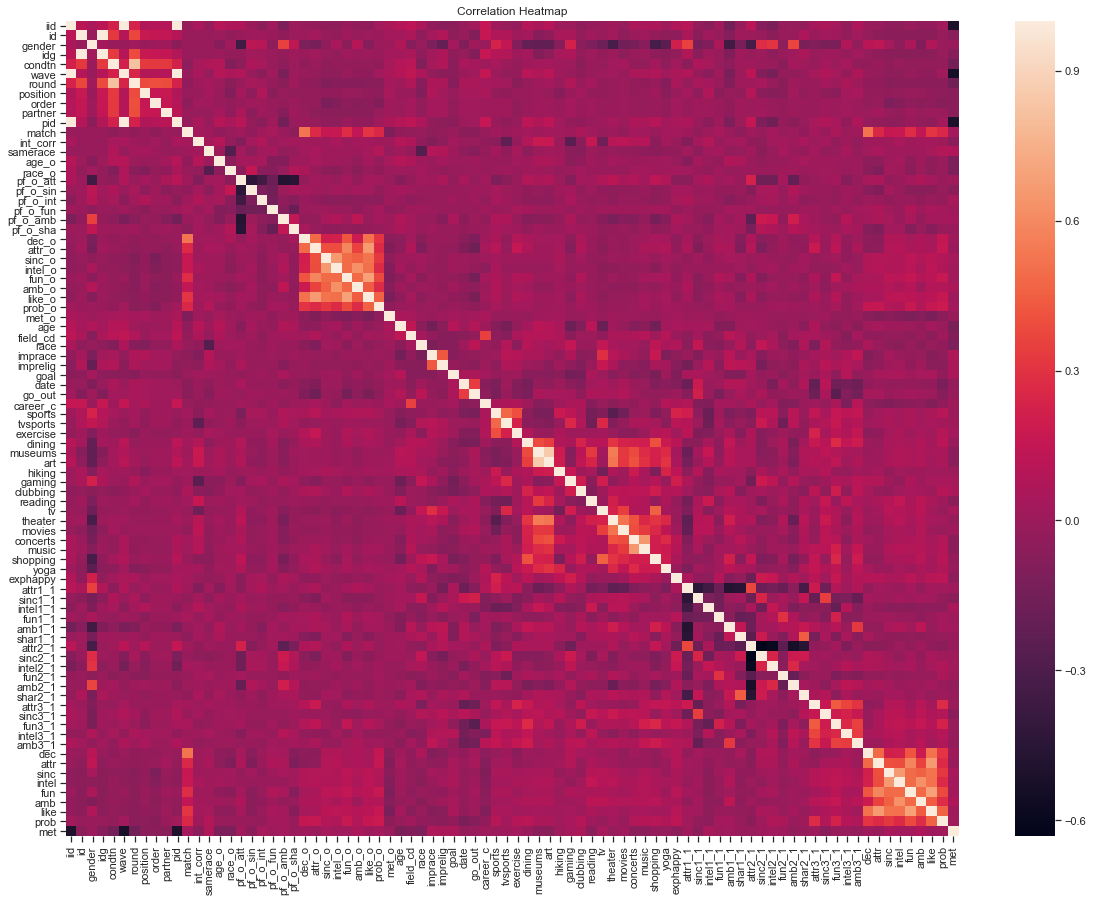

In [126]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = dating_cleaned.corr()
sns.set_style(style = 'white')
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

As we see from the heatmap above, men (gender = 1) prefer attractive partners (attr1_1) while women (gender = 0) prefer ambitious partners (amb1_1). 

Let's go deep and find out the interests that both genders like. For that, we will build several graphs.

,gender,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
0,0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
1,0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
2,0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
3,0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
4,0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
5,0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0


C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


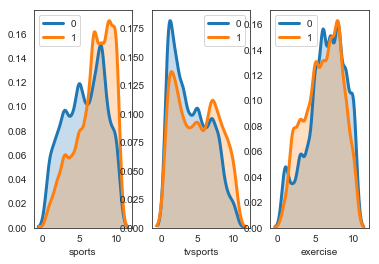

In [35]:
dating_graph = pd.concat([dating_cleaned.iloc[:, 2],dating_cleaned.iloc[:, 43:60]],axis = 1)
display(dating_graph.head(6))
genders=[0, 1]
fig, ax =plt.subplots(1,3)
for gender in genders:
    subset = dating_graph[dating_graph['gender'] == gender]
    sns.distplot(subset['sports'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = gender, ax=ax[0])
for gender in genders:
    subset = dating_graph[dating_graph['gender'] == gender]
    sns.distplot(subset['tvsports'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = gender, ax=ax[1])
for gender in genders:
    subset = dating_graph[dating_graph['gender'] == gender]
    sns.distplot(subset['exercise'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = gender, ax=ax[2])

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


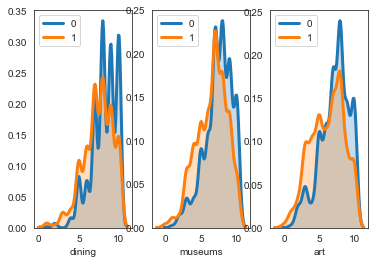

In [36]:
genders=[0, 1]
fig, ax =plt.subplots(1,3)
for gender in genders:
    subset = dating_graph[dating_graph['gender'] == gender]
    sns.distplot(subset['dining'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = gender, ax=ax[0])
for gender in genders:
    subset = dating_graph[dating_graph['gender'] == gender]
    sns.distplot(subset['museums'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = gender, ax=ax[1])
for gender in genders:
    subset = dating_graph[dating_graph['gender'] == gender]
    sns.distplot(subset['art'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = gender, ax=ax[2])

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


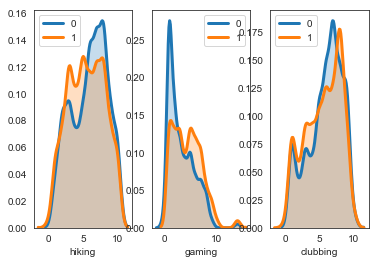

In [37]:
genders=[0, 1]
fig, ax =plt.subplots(1,3)
for gender in genders:
    subset = dating_graph[dating_graph['gender'] == gender]
    sns.distplot(subset['hiking'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = gender, ax=ax[0])
for gender in genders:
    subset = dating_graph[dating_graph['gender'] == gender]
    sns.distplot(subset['gaming'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = gender, ax=ax[1])
for gender in genders:
    subset = dating_graph[dating_graph['gender'] == gender]
    sns.distplot(subset['clubbing'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = gender, ax=ax[2])

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


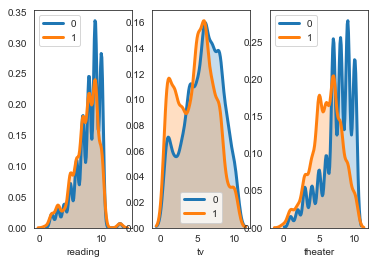

In [39]:
genders=[0, 1]
fig, ax =plt.subplots(1,3)
for gender in genders:
    subset = dating_graph[dating_graph['gender'] == gender]
    sns.distplot(subset['reading'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = gender, ax=ax[0])
for gender in genders:
    subset = dating_graph[dating_graph['gender'] == gender]
    sns.distplot(subset['tv'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = gender, ax=ax[1])
for gender in genders:
    subset = dating_graph[dating_graph['gender'] == gender]
    sns.distplot(subset['theater'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = gender, ax=ax[2])

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


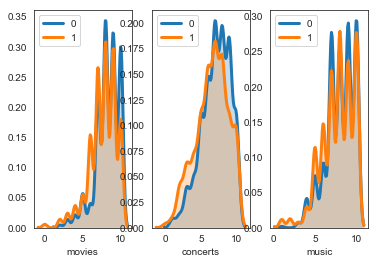

In [40]:
genders=[0, 1]
fig, ax =plt.subplots(1,3)
for gender in genders:
    subset = dating_graph[dating_graph['gender'] == gender]
    sns.distplot(subset['movies'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = gender, ax=ax[0])
for gender in genders:
    subset = dating_graph[dating_graph['gender'] == gender]
    sns.distplot(subset['concerts'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = gender, ax=ax[1])
for gender in genders:
    subset = dating_graph[dating_graph['gender'] == gender]
    sns.distplot(subset['music'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = gender, ax=ax[2])

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


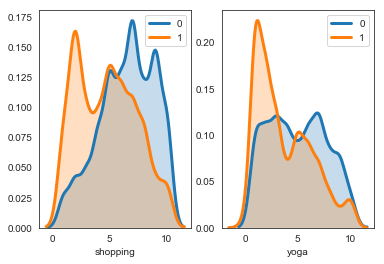

In [41]:
genders=[0, 1]
fig, ax =plt.subplots(1,2)
for gender in genders:
    subset = dating_graph[dating_graph['gender'] == gender]
    sns.distplot(subset['shopping'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = gender, ax=ax[0])
for gender in genders:
    subset = dating_graph[dating_graph['gender'] == gender]
    sns.distplot(subset['yoga'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = gender, ax=ax[1])

**3rd result:** The histograms above show that if you want to suggest a date that both genders are to enjoy, choose movies or dining.

However, referring back to the heatmap none of the interests really correlated with match, so I'll just remove these interests from my match prediction model.

In [85]:
dating_cleaned2 = dating_cleaned.drop(['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 
                    'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 
                   'shopping', 'yoga'], axis=1)
dating_cleaned2.head(5)

,iid,id,gender,idg,condtn,wave,round,position,order,partner,...,amb3_1,dec,attr,sinc,intel,fun,amb,like,prob,met
0,1,1.0,0,1,1,1,10,7,4,1,...,7.0,1,6.0,9.0,7.0,7.0,6.0,7.0,6.0,2.0
1,1,1.0,0,1,1,1,10,7,3,2,...,7.0,1,7.0,8.0,7.0,8.0,5.0,7.0,5.0,1.0
2,1,1.0,0,1,1,1,10,7,10,3,...,7.0,1,5.0,8.0,9.0,8.0,5.0,7.0,NaN,1.0
3,1,1.0,0,1,1,1,10,7,5,4,...,7.0,1,7.0,6.0,8.0,7.0,6.0,7.0,6.0,2.0
4,1,1.0,0,1,1,1,10,7,7,5,...,7.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,2.0


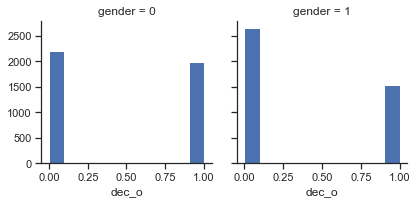

In [52]:
sns.set(style="ticks", color_codes=True)
g = sns.FacetGrid(dating_cleaned2, col="gender")
g = g.map(plt.hist, "dec_o")
plt.ticklabel_format(useOffset=False, style='plain')

In [75]:
# chi-square test
gender_crosstab = pd.crosstab(index=dating_cleaned2.gender, columns=dating_cleaned2.dec_o)
display(gender_crosstab)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(gender_crosstab)
p_val

dec_o,0,1
gender,,
0,2198,1986
1,2665,1529


2.238380959241545e-24

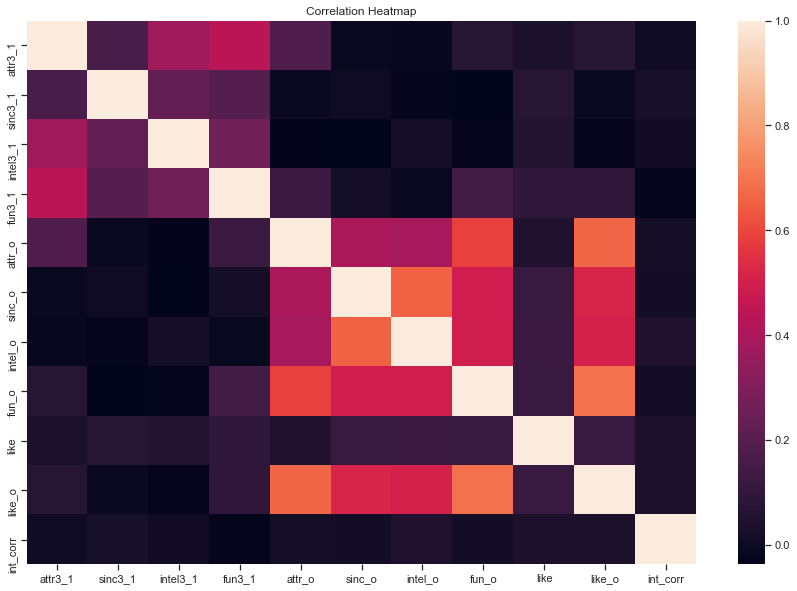

In [125]:
dating_cleaned3 = pd.concat([dating_cleaned2['attr3_1'],dating_cleaned2['sinc3_1'],dating_cleaned2['intel3_1'],dating_cleaned2['fun3_1'],dating_cleaned2['attr_o'],
                   dating_cleaned2['sinc_o'],dating_cleaned2['intel_o'],dating_cleaned2['fun_o'],dating_cleaned2['like'],dating_cleaned2['like_o'], 
                   dating_cleaned2['int_corr']],axis=1)
plt.subplots(figsize=(15,10))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = dating_cleaned3.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## 2. Modeling

In [132]:
# OLS model with coefficients
dating_cleaned2.match.head()
dating_model = dating_cleaned2[['attr_o','fun_o', 'sinc_o', 'intel_o','like_o','int_corr', 'dec_o', 'match']].dropna(axis=0, how='any')
X_model = dating_model[['attr_o','fun_o', 'sinc_o', 'intel_o','like_o','int_corr', 'dec_o']]
Y_model = dating_model.match.dropna(axis=0, how='any')
traits = sm.OLS(Y_model, X_model)
results_traits = traits.fit()
results_traits.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  match   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     733.6
Date:                Sat, 17 Nov 2018   Prob (F-statistic):               0.00
Time:                        22:56:30   Log-Likelihood:                -2160.9
No. Observations:                7729   AIC:                             4336.
Df Residuals:                    7722   BIC:                             4385.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
attr_o        -0.0128      0.003     -4.918      0.000      -0.018      -0.008
fun_o          0.0116      0.003      4.236      0.000       0.006       0.017
sinc_o         0.0024      0.003      0.841      0.400      -0.003       0.008
intel_o       -0.0021      0.003     -0.718      0.473      -0.008       0.004
like_o         0.0009      0.003      0.280      0.779      -0.006       0.007
int_corr       0.0166      0.012      1.392      0.164      -0.007       0.040
dec_o          0.3922      0.009     44.967      0.000       0.375       0.409
==============================================================================
Omnibus:                      518.168   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              615.984
Skew:                           0.682   Prob(JB):                    1.74e-134
Kurtosis:                       2.774   Cond. No.                         50.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
# preparing the data

X_train, X_test, y_train, y_test = train_test_split(X_model, Y_model, test_size=0.2, random_state=0, stratify=Y_model)

# logistic regression classification model
model = LogisticRegression(C=1, random_state=0)
lrc = model.fit(X_train, y_train)
predict_train_lrc = lrc.predict(X_train)
predict_test_lrc = lrc.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_lrc))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_lrc))

Training Accuracy: 0.8330907326540514
Validation Accuracy: 0.8311772315653299


In [122]:
# random forest model
model = RandomForestClassifier()
rf_model = model.fit(X_train, y_train)
predict_train_rf = rf_model.predict(X_train)
predict_test_rf = rf_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_rf))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_rf))

Training Accuracy: 0.9831796862364548
Validation Accuracy: 0.8285899094437258


In [123]:
# xgboost model
model = GradientBoostingClassifier()
xgb_model = model.fit(X_train, y_train)
predict_train_xgb = xgb_model.predict(X_train)
predict_test_xgb = xgb_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_xgb))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_xgb))

Training Accuracy: 0.853954391072295
Validation Accuracy: 0.8402328589909444
